# Lucas_Task20

### 3 - Regarding the distribution problem for the elbow muscles presented in this text:
a. Test different initial values for the optimization.

b. Test other values for the elbow angle where the results are likely to change.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym
from sympy.plotting import plot
import pandas as pd
from IPython.display import display
from IPython.core.display import Math

In [2]:
r_ef = np.loadtxt('C:/Users/ebm/Downloads/Lucas/r_elbowflexors.mot', skiprows=7)
f_ef = np.loadtxt('C:/Users/ebm/Downloads/Lucas/f_elbowflexors.mot', skiprows=7)

In [3]:
m_ef = r_ef*1
m_ef[:, 2:] = r_ef[:, 2:]*f_ef[:, 2:]

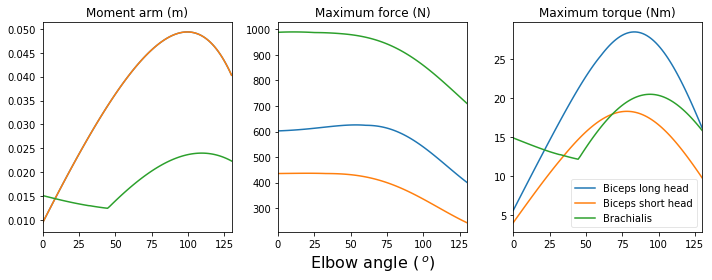

In [4]:
labels = ['Biceps long head', 'Biceps short head', 'Brachialis']
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(10, 4))
ax[0].plot(r_ef[:, 1], r_ef[:, 2:])
#ax[0].set_xlabel('Elbow angle $(\,^o)$')
ax[0].set_title('Moment arm (m)')
ax[1].plot(f_ef[:, 1], f_ef[:, 2:])
ax[1].set_xlabel('Elbow angle $(\,^o)$', fontsize=16)
ax[1].set_title('Maximum force (N)')
ax[2].plot(m_ef[:, 1], m_ef[:, 2:])
#ax[2].set_xlabel('Elbow angle $(\,^o)$')
ax[2].set_title('Maximum torque (Nm)')
ax[2].legend(labels, loc='best', framealpha=.5)
ax[2].set_xlim(np.min(r_ef[:, 1]), np.max(r_ef[:, 1]))
plt.tight_layout()
plt.show()

In [5]:
a_ef = np.array([624.3, 435.56, 987.26])/50  # 50 N/cm2
print(a_ef)

[ 12.486    8.7112  19.7452]


#### Test 1

In [6]:
M = 40  # desired torque at the elbow
iang = 80  # which will give the closest value to 90 degrees
r  = r_ef[iang, 2:]
f0 = f_ef[iang, 2:]
a  = a_ef
m  = m_ef[iang, 2:]
x0 = f_ef[iang, 2:]/10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

M = 40
x0 = [ 51.78948736  31.97872006  83.65566559]
r * x0 = 6.11695790214


#### Test 2

In [7]:
M = 80  # desired torque at the elbow
iang = 40  # which will give the closest value to 90 degrees
r  = r_ef[iang, 2:]
f0 = f_ef[iang, 2:]
a  = a_ef
m  = m_ef[iang, 2:]
x0 = f_ef[iang, 2:]/10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

M = 80
x0 = [ 62.58312845  42.94361276  97.71786525]
r * x0 = 5.38553888055


#### Test 3

In [8]:
M = 50  # desired torque at the elbow
iang = 60  # which will give the closest value to 90 degrees
r  = r_ef[iang, 2:]
f0 = f_ef[iang, 2:]
a  = a_ef
m  = m_ef[iang, 2:]
x0 = f_ef[iang, 2:]/10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

M = 50
x0 = [ 60.67171435  39.21827211  93.34593473]
r * x0 = 6.61186324316


### 4 - In an experiment to estimate forces of the elbow flexors, through inverse dynamics it was found an elbow flexor moment of 10 Nm. Consider the following data for maximum force (F0), moment arm (r), and pcsa (A) of the brachialis, brachioradialis, and biceps brachii muscles: F0 (N): 1000, 250, 700; r (cm): 2, 5, 4; A (cm2): 33, 8, 23, respectively (data from Robertson et al. (2013)).

a. Use static optimization to estimate the muscle forces.

b. Test the robustness of the results using different initial values for the muscle forces.

c. Compare the results for different cost functions.

#### Test 1

In [9]:
#Valores fornecidos: F0 (N): 1000, 250, 700; r (cm): 2, 5, 4; A(cm²): 33, 8, 23 


M = 40  # desired torque at the elbow
iang = 80 # which will give the closest value to 90 degrees
r  = np.array([2, 5, 4])
f0 = np.array([1000, 250, 700])
a  = np.array([33, 8, 23])
m  = r*f0
x0 = f0/10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

M = 40
x0 = [ 100.   25.   70.]
r * x0 = 605.0


#### Test 2

In [10]:
#Valores fornecidos: F0 (N): 1000, 250, 700; r (cm): 2, 5, 4; A(cm²): 33, 8, 23 


M = 80  # desired torque at the elbow
iang = 40 # which will give the closest value to 90 degrees
r  = np.array([2, 5, 4])
f0 = np.array([1000, 250, 700])
a  = np.array([33, 8, 23])
m  = r*f0
x0 = f0/10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

M = 80
x0 = [ 100.   25.   70.]
r * x0 = 605.0


#### Test 3

In [11]:
#Valores fornecidos: F0 (N): 1000, 250, 700; r (cm): 2, 5, 4; A(cm²): 33, 8, 23 


M = 50  # desired torque at the elbow
iang = 60 # which will give the closest value to 90 degrees
r  = np.array([2, 5, 4])
f0 = np.array([1000, 250, 700])
a  = np.array([33, 8, 23])
m  = r*f0
x0 = f0/10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

M = 50
x0 = [ 100.   25.   70.]
r * x0 = 605.0
